In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('dataset.csv')

In [5]:
df.head(12)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [6]:
df.isna().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [9]:
df.tail(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [10]:
df.columns=['Month','Sales']

In [11]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum()

Month    0
Sales    0
dtype: int64

In [17]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [18]:
# convert month into Datetime

df['Month']=pd.to_datetime(df['Month'])

In [19]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [20]:
df.set_index('Month',inplace=True)

In [21]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


## VISUALIZE THE DATA

<Axes: xlabel='Month'>

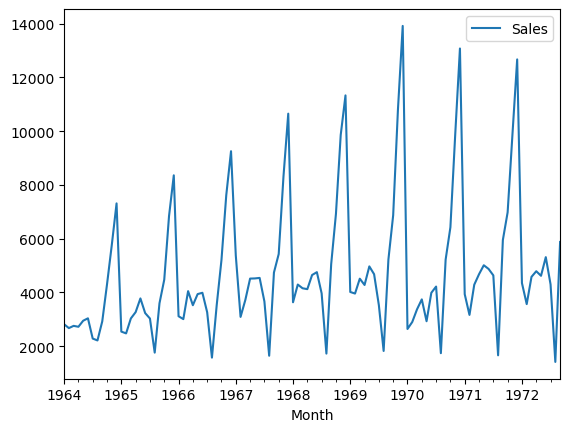

In [22]:
df.plot()

In [23]:
# test for data if it is stationary or not


In [25]:
from statsmodels.tsa.stattools import adfuller

In [27]:
test_result=adfuller(df['Sales'])

test_result

(-1.8335930563276188,
 0.363915771660247,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [45]:
#Ho: Its is non stationary 
#H1: It is stationary 

def adfuller_test(sales):
    result =adfuller(sales)
    labels=['ADF Test Statistic','p-value','#Lags Used', 'Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <=0.05 :
        print("strong evidence against the null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non stationary")
    

In [46]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276188
p-value : 0.363915771660247
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non stationary


# Differencing

In [47]:
df['Sales first Difference']=df['Sales']-df['Sales'].shift(1)

In [48]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [49]:
df.head()

,Sales,Sales first Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [50]:
df['Seasonal First Difference']=df['Sales'] - df['Sales'].shift(12)  # one season is of 12 months

In [51]:
df.head(15)


,Sales,Sales first Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [52]:
df['Sales'].shift(12)

Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01       NaN
1964-04-01       NaN
1964-05-01       NaN
               ...  
1972-05-01    5010.0
1972-06-01    4874.0
1972-07-01    4633.0
1972-08-01    1659.0
1972-09-01    5951.0
Name: Sales, Length: 105, dtype: float64

In [53]:
## Test dickey fuller test 

adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

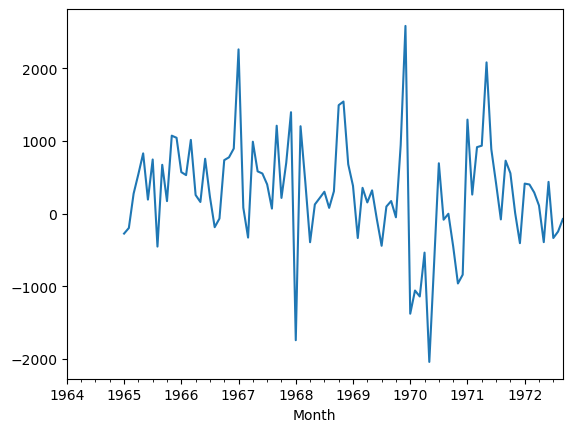

In [54]:
df['Seasonal First Difference'].plot()

## AUTO REGRESSIVE MODEL

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [58]:
import statsmodels.api as sm

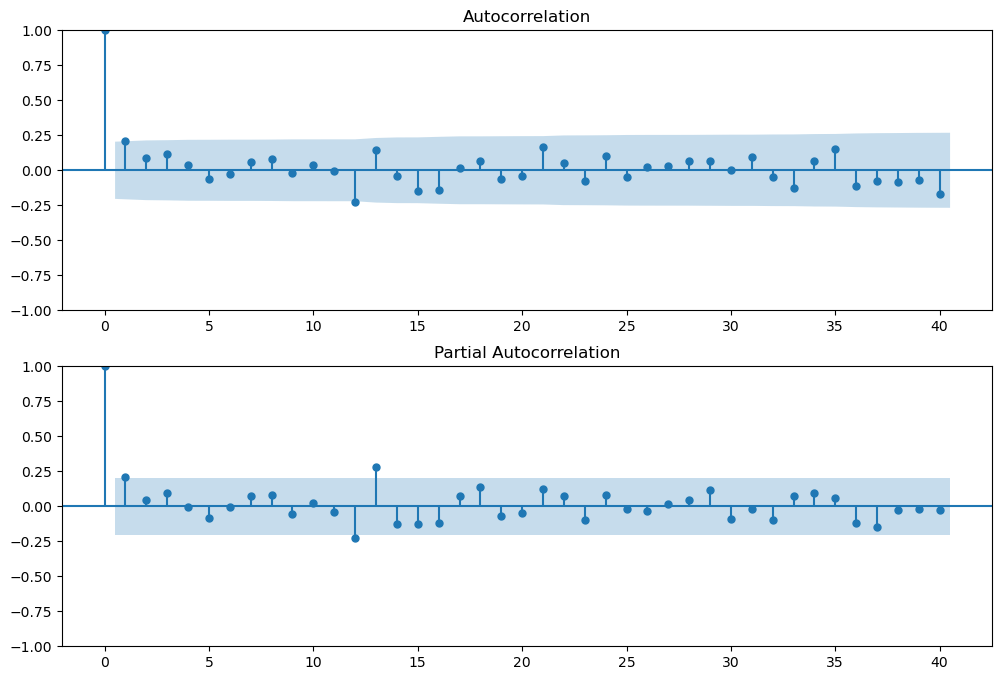

In [60]:
fig=plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [63]:
# for non seasonal data 
# p=1
# d=1
# q=0 or 1 

from statsmodels.tsa.arima.model import ARIMA

In [64]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/Users/_dijkstra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/_dijkstra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/_dijkstra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 18 Mar 2024   AIC                           1911.627
Time:                        16:43:17   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

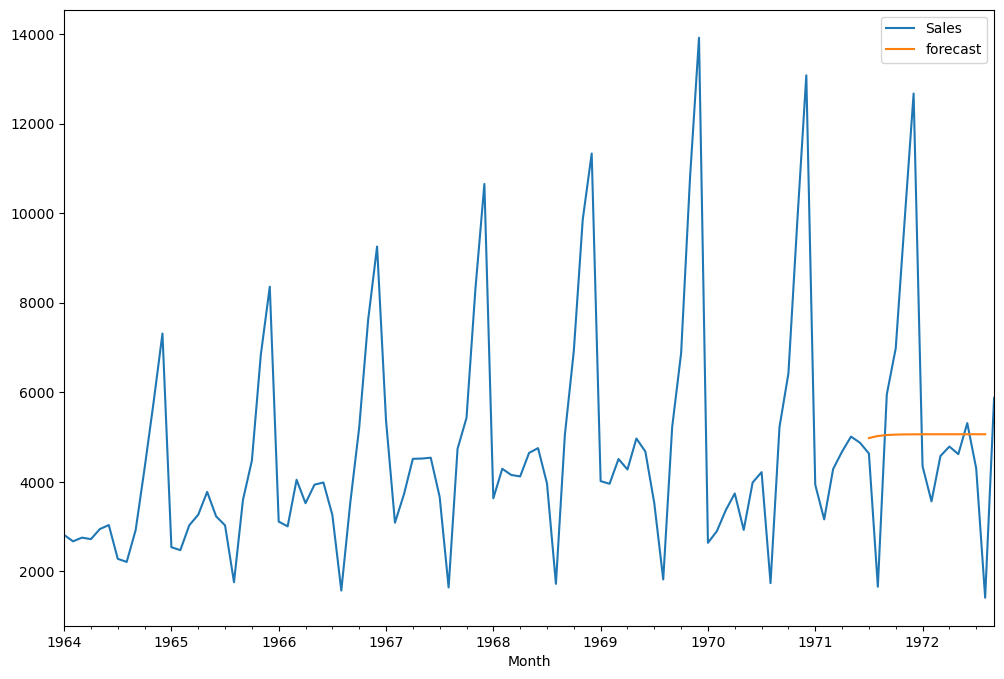

In [67]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [68]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

/Users/_dijkstra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/_dijkstra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07295D+00    |proj g|=  4.80911D-02

At iterate    5    f=  7.04942D+00    |proj g|=  1.53381D-02

At iterate   10    f=  7.04713D+00    |proj g|=  2.99464D-04

At iterate   15    f=  7.04708D+00    |proj g|=  5.05893D-03

At iterate   20    f=  7.04413D+00    |proj g|=  1.18412D-02

At iterate   25    f=  7.03252D+00    |proj g|=  1.06314D-03

At iterate   30    f=  7.03240D+00    |proj g|=  5.49353D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<Axes: xlabel='Month'>

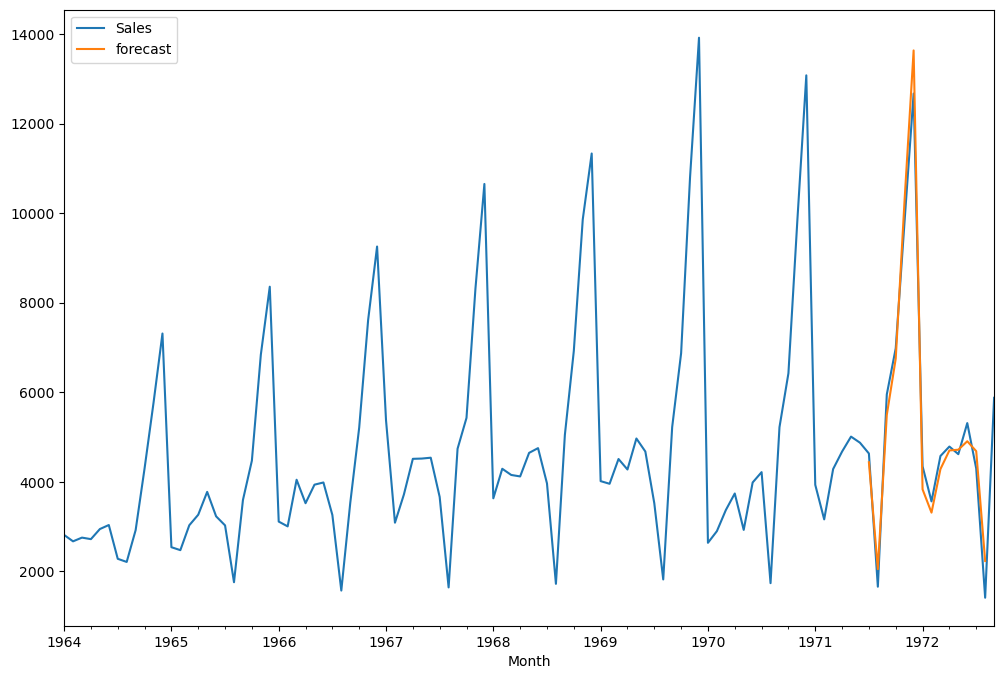

In [72]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [73]:
df.head(20)


,Sales,Sales first Difference,Seasonal First Difference,forecast
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
1964-06-01,3036.0,90.0,NaN,NaN
1964-07-01,2282.0,-754.0,NaN,NaN
1964-08-01,2212.0,-70.0,NaN,NaN
1964-09-01,2922.0,710.0,NaN,NaN


In [75]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x) for x in range(0,24) ]

In [76]:
future_dates_df =pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [77]:
future_dates_df.tail()

,Sales,Sales first Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [79]:
future_df=pd.concat([df,future_dates_df])

<Axes: >

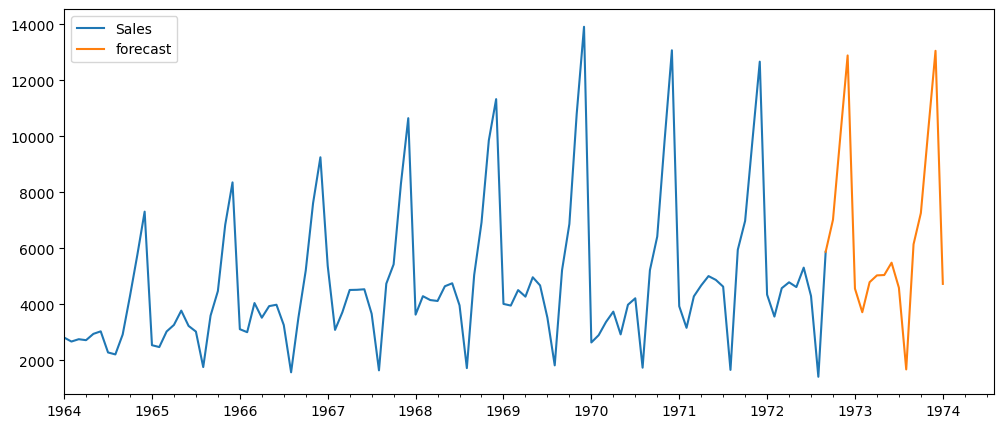

In [80]:
future_df['forecast']=results.predict(start=104,end=120,dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,5))

In [81]:
future_df

,Sales,Sales first Difference,Seasonal First Difference,forecast
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
